In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="1234567890",
    database="cricket",
    port=3306
)

print("connected sucessfully")

connected sucessfully


In [3]:
query = """
SELECT
  p.full_name,
  m.match_type,
  s.runs_scored,
  s.wickets,
  s.catches
from player_match_stats s
JOIN players p ON s.player_id = p.player_id
JOIN matches m ON s.match_id = m.match_id
""" 
df = pd.read_sql(query,conn)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_4884\893443828.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


,full_name,match_type,runs_scored,wickets,catches
0,Virat Kohli,ODI,78,0,1
1,Rohit Sharma,ODI,45,0,0
2,Jasprit Bumrah,ODI,5,3,0
3,David Warner,ODI,60,0,0
4,Mitchell Starc,ODI,20,2,0
5,Virat Kohli,ODI,78,0,1
6,Rohit Sharma,ODI,45,0,0
7,Jasprit Bumrah,ODI,5,3,0
8,David Warner,ODI,60,0,0
9,Mitchell Starc,ODI,20,2,0


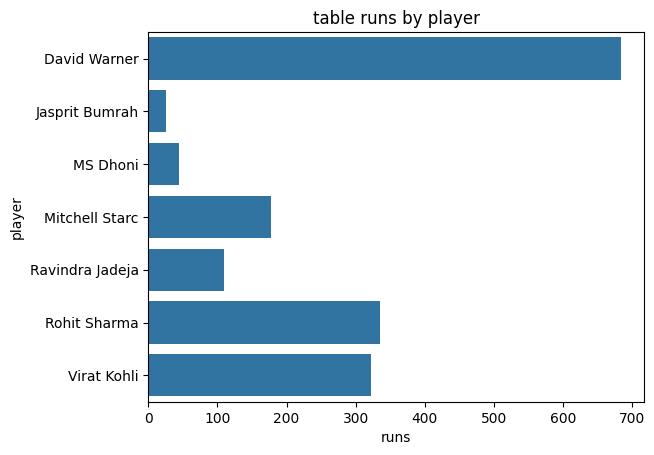

In [5]:
runs_df = df.groupby("full_name")["runs_scored"].sum().reset_index()

plt.Figure()
sns.barplot(data=runs_df, x="runs_scored", y="full_name")
plt.title("table runs by player")
plt.xlabel("runs")
plt.ylabel("player")
plt.show()

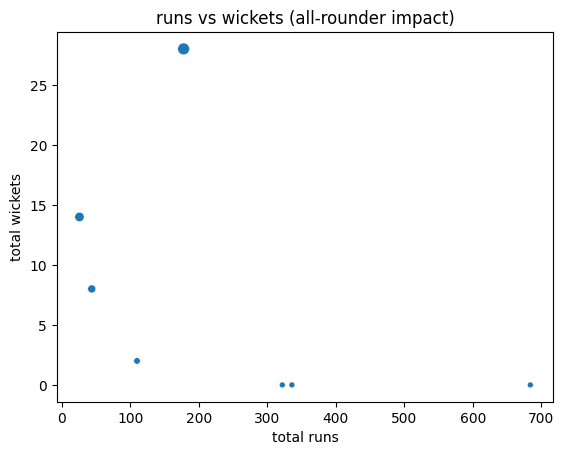

In [6]:
agg_df = df.groupby("full_name")[["runs_scored","wickets"]].sum().reset_index()

plt.Figure()
sns.scatterplot(
    data=agg_df,
    x="runs_scored",
    y="wickets",
    size="wickets",
    legend=False
)
plt.title("runs vs wickets (all-rounder impact)")
plt.xlabel("total runs")
plt.ylabel("total wickets")
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\site-packages\\matplotlib\\pyplot.py'>

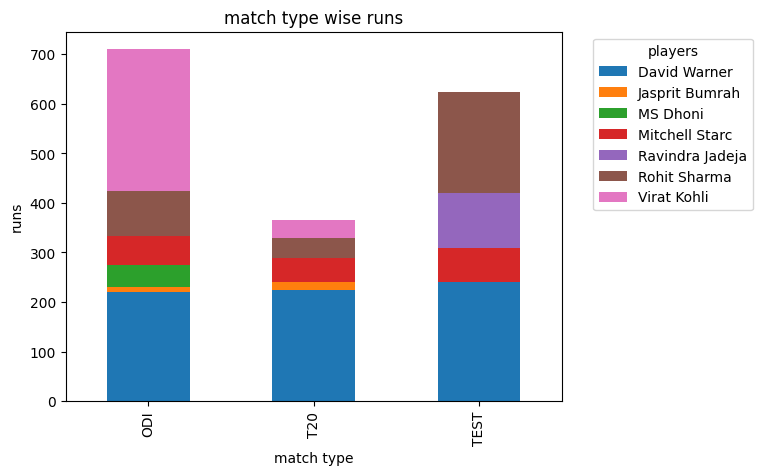

In [7]:
match_runs = df.groupby(["match_type","full_name"])["runs_scored"].sum().unstack()

match_runs.plot(kind="bar",stacked=True)
plt.title("match type wise runs")
plt.xlabel("match type")
plt.ylabel("runs")
plt.legend(title="players",bbox_to_anchor=(1.05,1))
plt

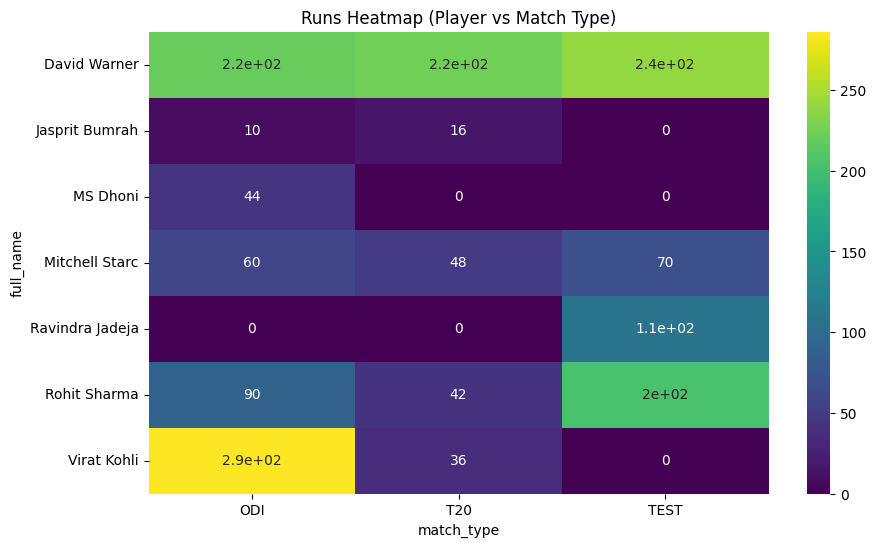

In [8]:
pivot = df.pivot_table(
    values="runs_scored",
    index="full_name",
    columns="match_type",
    aggfunc="sum",
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="viridis")
plt.title("Runs Heatmap (Player vs Match Type)")
plt.show()

In [9]:
best_performer = df.loc[df.groupby("match_type")["runs_scored"].idxmax()]
print(best_performer[["match_type","full_name","runs_scored"]])

   match_type     full_name  runs_scored
0         ODI   Virat Kohli           78
36        T20  David Warner           70
20       TEST  David Warner          120


C:\Users\DELL\AppData\Local\Temp\ipykernel_4884\3610086193.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  team_df = pd.read_sql(query, conn)


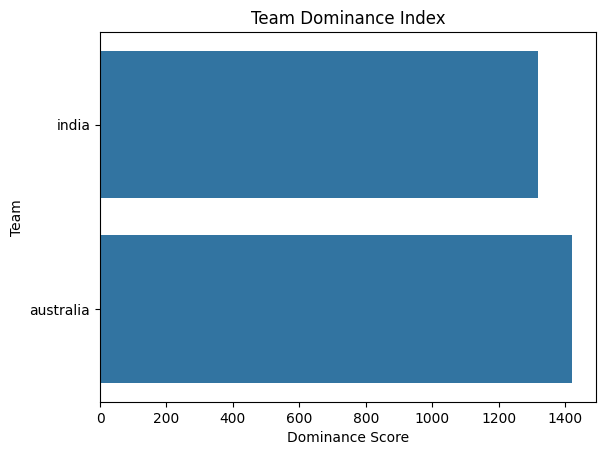

In [10]:
query = """
SELECT 
    t.team_name,
    SUM(s.runs_scored) AS total_runs,
    SUM(s.wickets) AS total_wickets
FROM player_match_stats s
JOIN players p ON s.player_id = p.player_id
JOIN teams t ON p.country = t.country
GROUP BY t.team_name
"""
team_df = pd.read_sql(query, conn)

team_df["dominance"] = team_df["total_runs"] + team_df["total_wickets"] * 20

plt.figure()
sns.barplot(data=team_df, x="dominance", y="team_name")
plt.title("Team Dominance Index")
plt.xlabel("Dominance Score")
plt.ylabel("Team")
plt.show()